In [2]:
# Dependencies
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

# Set the seed so our data is reproducible
random.seed(42)

In [3]:
# Sample versus population example fuel economy
#Read in the data
fuel_df = pd.read_csv("2019_fuel_economy.csv")

# First overview the data set - how many factors, etc.
fuel_df.head()

,Type,Combined_LP100KM,Make_Model
0,Two Seaters,11.2007,Acura_NSX
1,Two Seaters,8.4184,ALFA ROMEO_4C
2,Two Seaters,11.2299,Aston Martin Lagonda Ltd_Vantage V8
3,Two Seaters,9.0484,Audi_TT Roadster quattro
4,Two Seaters,8.5130,BMW_Z4 sDrive30i


In [4]:
# Calculate the summary statistics and plot the histogram of the entire population data
#Mean
mean_fuel = round(fuel_df["Combined_LP100KM"].mean(), 2)
print(f'The mean L/100km of all vehicles is: {mean_fuel}')

#Standard Deviation
sd_fuel = round(np.std(fuel_df["Combined_LP100KM"]), 2)
print(f"The standard deviation of all vehicle's L/100km is: {sd_fuel}")

The mean L/100km of all vehicles is: 10.67
The standard deviation of all vehicle's L/100km is: 2.47


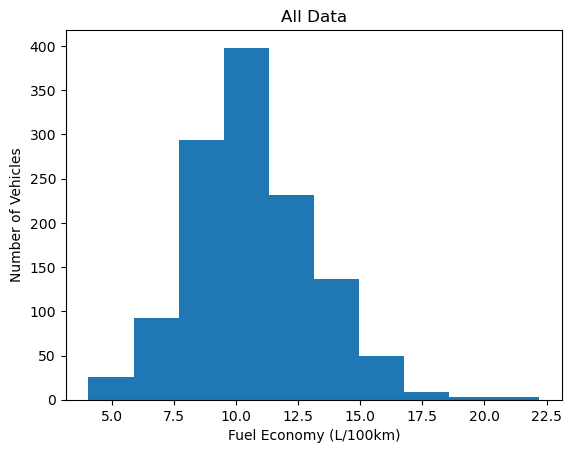

In [5]:
#Plot the histogram of fuel economy vs. vehicles
plt.hist(fuel_df["Combined_LP100KM"])
plt.xlabel("Fuel Economy (L/100km)")
plt.ylabel("Number of Vehicles")
plt.title("All Data")
plt.show()

In [6]:
# Calculate the summary statistics and plot the histogram of the sample data using iloc
subset = fuel_df.iloc[range(766,856)]

#Mean
mean_subset = round(subset["Combined_LP100KM"].mean(), 2)
print(f'The mean L/100km of all vehicles is: {mean_subset}')

#Standard Deviation
sd_subset = round(np.std(subset["Combined_LP100KM"]), 2)
print(f"The standard deviation of all vehicle's L/100km is: {sd_subset}")

The mean L/100km of all vehicles is: 12.95
The standard deviation of all vehicle's L/100km is: 1.73


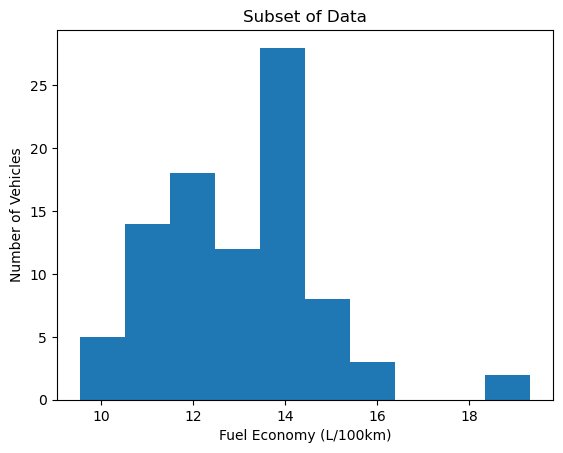

In [7]:
#Plot the histogram of subset fuel economy vs. vehicles
plt.hist(subset["Combined_LP100KM"])
plt.xlabel("Fuel Economy (L/100km)")
plt.ylabel("Number of Vehicles")
plt.title("Subset of Data")
plt.show()

In [9]:
# Generate a new 30 vehicle sample and calculate the SEM of the sample
sample = fuel_df.sample(n=30)
sem_sample = sample["Combined_LP100KM"].sem()
print(f'The SEM value for the sample fuel economy data is {sem_sample}')

The SEM value for the sample fuel economy data is 0.5195258409910629


In [11]:
# Create a sample set of 10, each with 30 vehicles
vehicle_sample_set = [fuel_df.sample(30) for x in range(0, 10)]

means = [sample["Combined_LP100KM"].mean() for sample in vehicle_sample_set]
standard_errors = [sem(sample["Combined_LP100KM"]) for sample in vehicle_sample_set]


In [15]:
#Generate the x axis length (sample numbers)
x_axis = np.arange(1, len(vehicle_sample_set)+1, 1)
x_axis

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

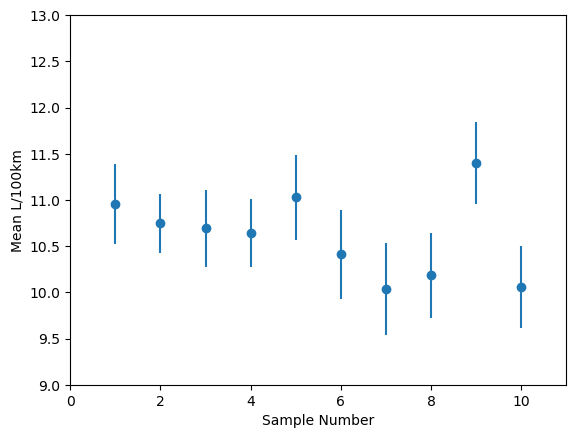

In [19]:
# Generate the plot data for each sample 
fig, ax = plt.subplots()
ax.errorbar(x_axis, means, standard_errors, fmt="o")

#Set the axis limits & labels
ax.set_xlim(0, len(vehicle_sample_set)+1)
ax.set_ylim(9, 13)
ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean L/100km")

#Plot
plt.show()